In [1]:

import pandas as pd
import numpy as np
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import datetime

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from statsmodels.formula.api  import ols
import statsmodels.api as sm

from scipy import stats
from datetime import datetime
from scipy.stats import pearsonr

In [97]:
#data1 = pd.read_csv(r'/Users/cairo/Google Drive/wechat data/TopicOutcomeAll30Topic.csv', sep=',', error_bad_lines=False, index_col=False, dtype='unicode')

data1 = pd.read_csv(r'/Users/cairo/Google Drive/wechat data/TopicOutcomeAll20Topic.csv', sep=',', error_bad_lines=False, index_col=False, dtype='unicode')

#topicdata = pd.read_csv(r'C:/Users/Junhao/Google Drive/wechat data/TopicOutcomeAll20Topic.csv', sep=',', error_bad_lines=False, index_col=False, dtype='unicode')

data1.drop(['summary', 'url', 'sourceUrl', 'videoUrl', 'audioUrl', 'musicUrl', 'imageUrl','type'], axis=1)

#data1 = data1.iloc[:5000]

,name,account,author,title,likeCount,clicksCount,publicTime,orderNum,originalFlag,updateTime,...,topic10,topic11,topic12,topic13,topic14,topic15,topic16,topic17,topic18,topic19
0,南京吃喝玩乐,happyinnanjing,南京吃喝玩乐,住宾馆时，怎么知道房间有没有针孔摄像头？,175,27784,2015-01-26 12:55:11,4,0,2015-02-02 11:21:26,...,40.71615,0.05,0.05,0.05,46.502632,0.05,0.05,0.05,0.05,0.05
1,正商阅读,zsyd88,政商阅读,千年至理：爱子七不责,139,56752,2015-01-24 19:02:07,6,0,2015-02-03 10:10:26,...,0.05,23.704185,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
2,南京吃喝玩乐,happyinnanjing,南京吃喝玩乐,▶太恶心了，吃火锅前一定要注意，速看！,113,20763,2015-01-26 12:55:11,3,0,2015-02-02 11:21:26,...,0.05,0.05,0.05,0.05,10.045543,0.05,0.05,0.05,0.05,0.05
3,国学精粹与生活艺术,gxjhshys,国学精粹与生活艺术,小时候，你这样二过吗？百分百中枪有木有！,454,87840,2015-01-18 08:34:10,7,0,2015-01-26 16:48:35,...,0.05,44.87632,0.05,9.980097,0.05,0.05,20.219387,0.05,0.05,0.05
4,南京吃喝玩乐,happyinnanjing,南京吃喝玩乐,太有用了！看到第二个我就收了!,161,17728,2015-01-27 21:38:15,4,0,2015-02-02 11:30:38,...,3.7585173,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5525373,中国新闻网,cns2012,中国新闻网,陈曾吉、方洪有、侯永信、冉绪碧、许玉忠、周少武！,71,7933,2019-09-30 09:34:40,1,0,2019-10-03 13:51:09,...,0.05,0.05,0.050000004,0.05,61.394962,16.971502,0.05,0.05,16.873358,0.05
5525374,中国搜索,chinaso_com,中国搜索,国庆加班，算算你能拿多少工资？,48,5820,2019-09-28 07:33:10,2,0,2019-10-01 11:42:26,...,0.05,0.05,0.05,0.05,0.05,0.055209883,0.05,0.05,0.05,24.118286
5525375,中国搜索,chinaso_com,中国搜索,看哭！中国女排十冠王专属MV，祝福中国！,145,6450,2019-09-28 21:03:24,2,0,2019-10-01 11:42:59,...,0.05,0.05,29.398489,0.05,0.05,0.05,13.299494,2.2860072,0.05,7.316064
5525376,中国新闻网,cns2012,中国新闻网,国庆当天，他们将率先走过天安门！,205,19003,2019-09-29 10:06:12,1,0,2019-10-02 11:36:33,...,8.1290455,0.05,12.735691,0.05,0.05,19.25733,0.05,2.8399734,0.05,0.05


In [98]:
Startdate = datetime(2014, 9, 1)
NTopics = 20 
WindowWidth = 30
StepLength = 30
TotalDays = 1200

PosTopic0 = data1.columns.get_loc("topic0")

publictime = data1['publicTime'].tolist()

Nobs = len(publictime)
pubtime = np.zeros(Nobs)
Topic = np.zeros(Nobs)


In [99]:

#datetemp=[datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in publictime]
#pubtime = [(x - Startdate).days for x in datetemp]
#Topic = [np.argmax(np.asarray(data1.iloc[x,PosTopic0:PosTopic0+NTopics].tolist())) for x in data1]
for i in range (0,Nobs - 300):
    datetemp = datetime.strptime(publictime[i], '%Y-%m-%d %H:%M:%S')
    pubtime[i] = (datetemp - Startdate).days
    Topic[i] = np.argmax(np.asarray(data1.iloc[i,PosTopic0:PosTopic0+NTopics].tolist()))


data1['Topic'] = Topic.tolist()
data1['pubtime'] = pubtime.tolist()
data1['initial_date'] = 0

data1.sort_values(by=['account','pubtime'], inplace=True)

AccountList = list(data1['account'].unique())
NAccounts = len(AccountList)
InitialExistAccounts = np.zeros(NAccounts)
data1['AccountAge'] = 0

In [100]:
#group the data by its account name
DF_list= list()
for i in data1.account.unique():
   dff = data1[data1["account"].isin([i])]
   dff["std"] = dff.filter(like='topic', axis=1).astype(float).std(axis = 1)
   DF_list.append(dff)
   


<ipython-input-100-dd832a9dc132>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["std"] = dff.filter(like='topic', axis=1).astype(float).std(axis = 1)


In [101]:
###################################
# compute the age of an article: count the date difference between the publication date and 
#the date of the creation of the account

pp= []
for i in DF_list:
    i['initial_date2'] = np.min(i['pubtime'].to_numpy())
    i['to_initial_date2'] = i['pubtime'] - i['initial_date']
    i['AccountAge2'] = np.max(i['pubtime'].to_numpy())
    pp.append(i)
merged = pd.concat(pp)

<ipython-input-101-5a39c2561ac1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['initial_date2'] = np.min(i['pubtime'].to_numpy())
<ipython-input-101-5a39c2561ac1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['to_initial_date2'] = i['pubtime'] - i['initial_date']
<ipython-input-101-5a39c2561ac1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [102]:
# Delete outliers
ddlist2 = merged[(merged.clicksCount.astype(int) <= 100001) & (merged.clicksCount.astype(int) >= 0) & 
              (merged.likeCount.astype(int) <= 100001) & (merged.likeCount.astype(int) >= 0)] 

In [103]:
ddlist2["likeCount"] = pd.to_numeric(ddlist2["likeCount"], downcast="float")
likecount_article_age = ddlist2.groupby(["to_initial_date2"])[['likeCount']].mean()
likecount_article_age

<ipython-input-103-951bf2f8b349>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddlist2["likeCount"] = pd.to_numeric(ddlist2["likeCount"], downcast="float")


,likeCount
to_initial_date2,
0.0,127.288521
1.0,51.205608
2.0,45.376472
3.0,49.089821
4.0,39.963963
...,...
1915.0,262.825256
1916.0,266.117615
1917.0,218.074799


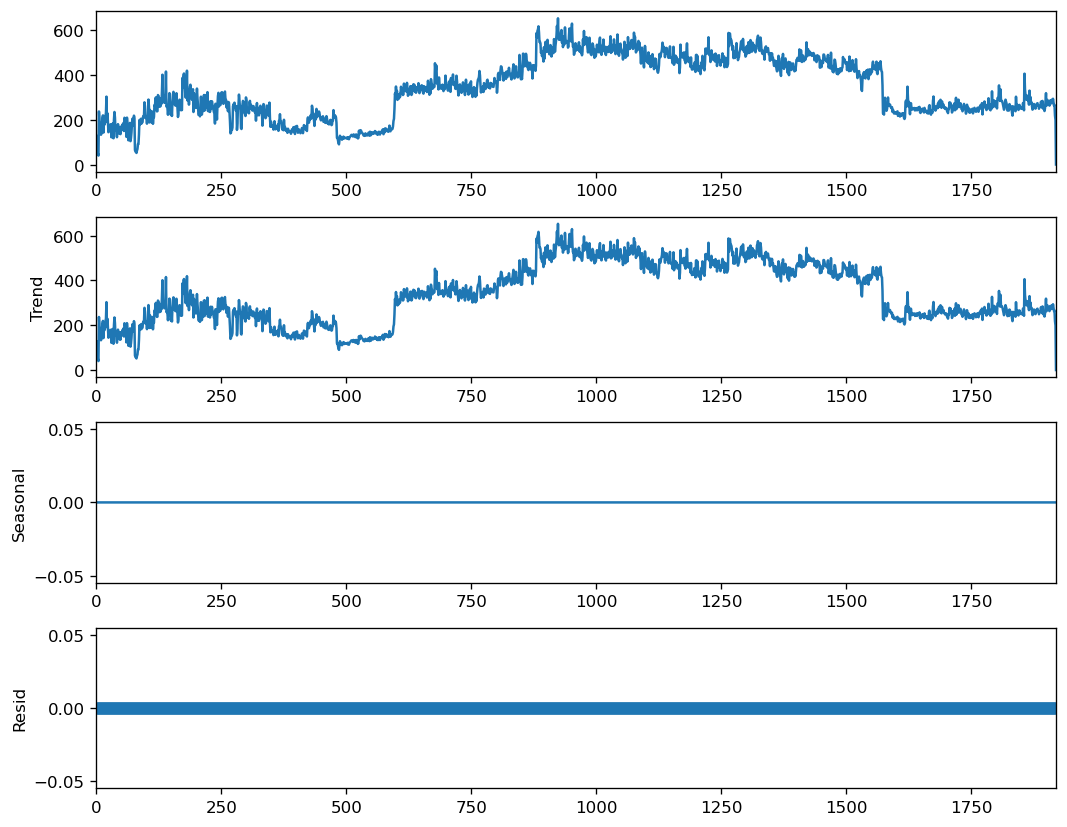

In [104]:
#decompose the time series

from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
#series = [i+randrange(10) for i in range(1,100)]
result = seasonal_decompose(likecount_article_age, model='additive', period=1)
result.plot()
pyplot.show()

In [105]:
# adfuller test suggests the series is stationary

from pandas import read_csv
from statsmodels.tsa.stattools import adfuller

result = adfuller(tt)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.560242
p-value: 0.000153
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.573


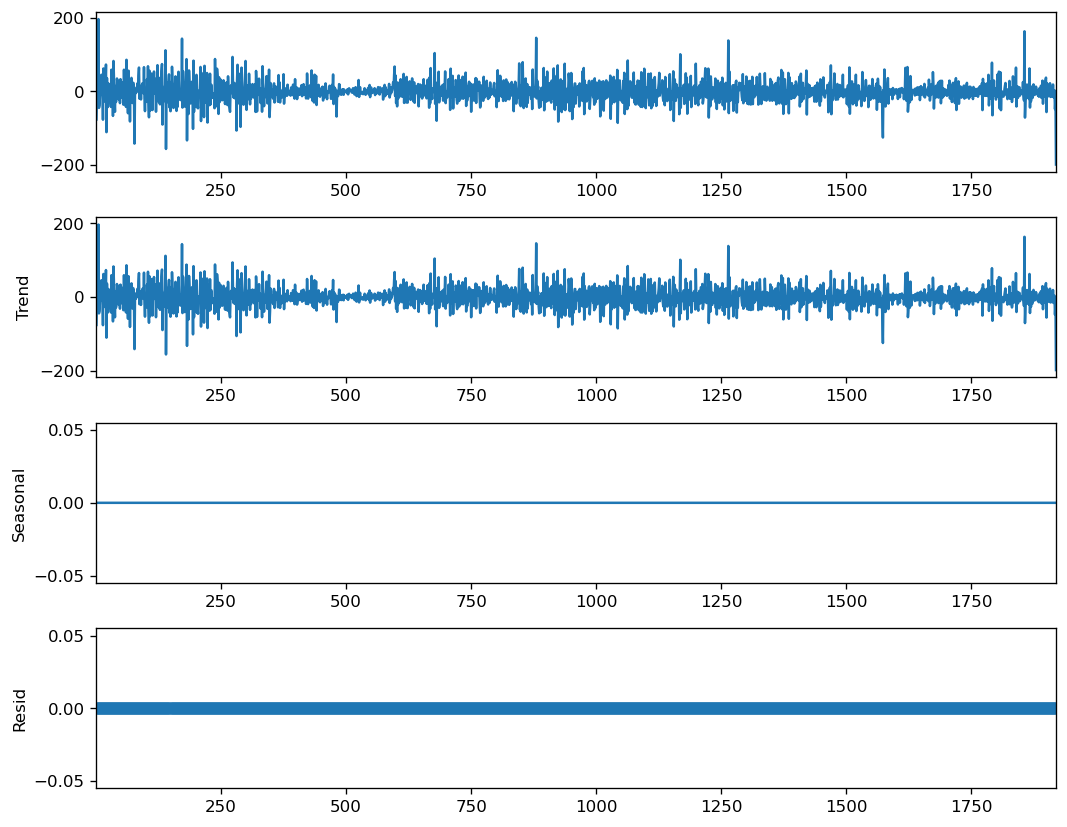

In [106]:
#show the decomposition plot after differencing one time
likecount_article_age2 = likecount_article_age.diff()
likecount_article_age2 = likecount_article_age2.iloc[1:]
result = seasonal_decompose(likecount_article_age2, model='additive', period=1)
result.plot()
pyplot.show()

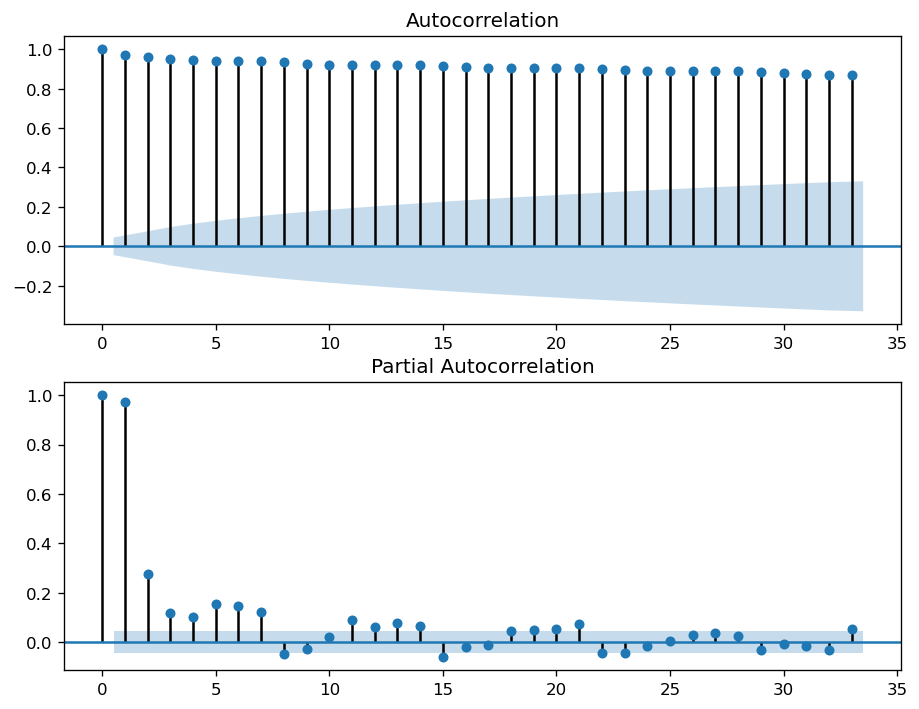

In [112]:

from pandas import read_csv
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
#series = read_csv('stationary.csv')
pyplot.figure()
pyplot.subplot(211)
plot_acf(likecount_article_age, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(likecount_article_age, ax=pyplot.gca())
pyplot.show()


In [120]:
#train the SARIMAX model

#the above ACF and PACF suggest AR = 15 and MA is very large
    
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

mm = sm.tsa.statespace.SARIMAX(likecount_article_age, order = (15,0,30), model='additive')

forecast = res.get_forecast(steps = 7)

res = mm.fit(disp=False)
print(res.summary())

/Users/cairo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/cairo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/cairo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/cairo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converg

                               SARIMAX Results                                
Dep. Variable:              likeCount   No. Observations:                 1920
Model:             SARIMAX(15, 0, 30)   Log Likelihood               -8972.602
Date:                Tue, 02 Mar 2021   AIC                          18037.204
Time:                        10:53:30   BIC                          18292.968
Sample:                             0   HQIC                         18131.309
                               - 1920                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2981      0.431     -0.692      0.489      -1.143       0.546
ar.L2          0.2793      0.423      0.661      0.509      -0.549       1.108
ar.L3          0.2466      0.443      0.557      0.5

In [ ]:
#kk2 = df3[[ "Price_gifts", "gifts_PA_index_price", "gifts_PA_index", "gifts_PricePromo_index_price",
                          # "comp_sales", "comp_PA_index_price", "comp_PricePromo_index_price"]]
#mm = sm.tsa.statespace.SARIMAX(ddlist2['clicksCount'], order = (1,0,1), exog = kk2, model='additive')

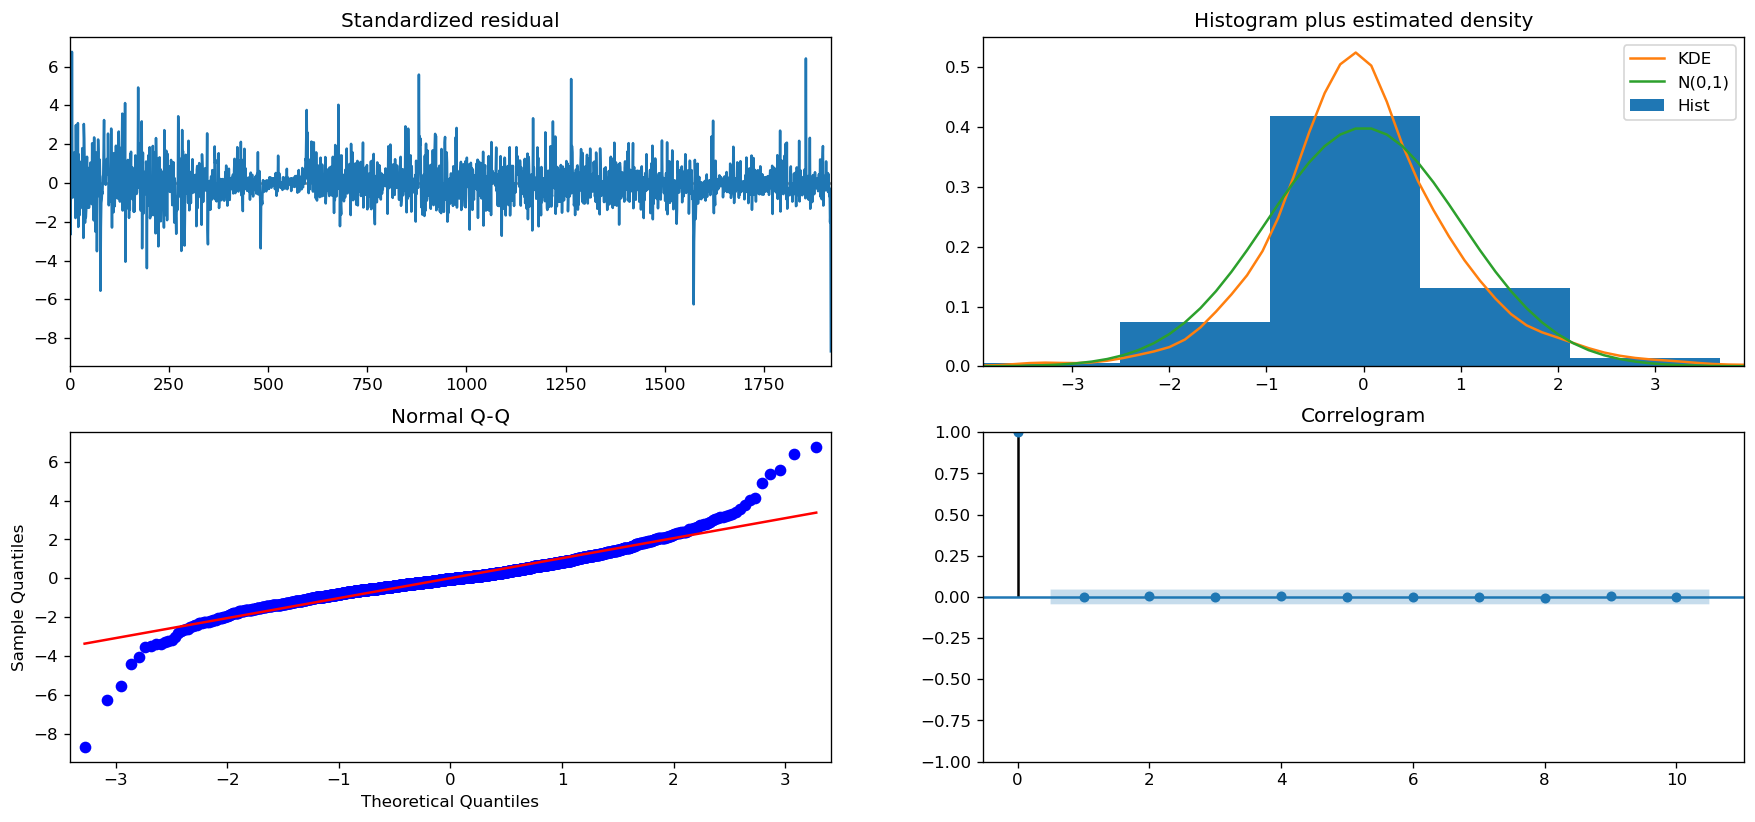

In [121]:
res.plot_diagnostics(figsize=(18, 8))
plt.show()

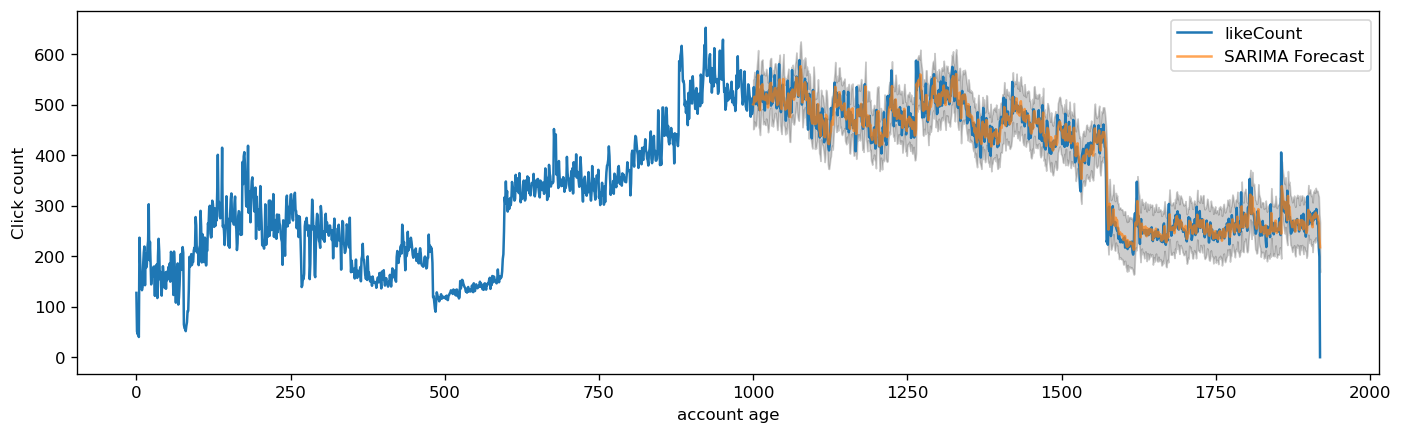

In [124]:
pred = res.get_prediction(start=1000, dynamic=False)
pred_ci = pred.conf_int()

ax =likecount_article_age[0:].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='SARIMA Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('account age')
ax.set_ylabel('Click count')
plt.legend()
plt.show()

# the plot below suggest the SARIMA model performs relatively well